In [1]:
import pandas as pd
import numpy as np
import time 
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
stop_words = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')

In [3]:
df1 = pd.read_csv("ones.csv", delimiter = ',')
df2 = pd.read_csv("twos.csv", delimiter = ',')
df3 = pd.read_csv("threes.csv", delimiter = ',')
df4 = pd.read_csv("fours.csv", delimiter = ',')
df5 = pd.read_csv("fives.csv", delimiter = ',')

In [4]:
import numpy as np

In [5]:
train_text = []
test_text = []

for i in range (0, 20000):
    train_text.append(df1['review'][i])

for i in range (0, 20000):
    train_text.append(df2['review'][i])
    
for i in range (0, 20000):
    train_text.append(df3['review'][i])

for i in range (0, 20000):
    train_text.append(df4['review'][i])

for i in range (0, 20000):
    train_text.append(df5['review'][i])
    
print(len(train_text))

100000


In [6]:
print(train_text[0])

I thought Tidy's Flowers had a great reputation as a florist, but I guess I was wrong!

For Valentine's Day my boyfriend had ordered roses with Tidy's. However, the flowers that were delivered was not what he had ordered. He had placed in an order for long stem roses, mixed with orchids and was charged for that. What had showed up was a small vase with 4 short cut roses and some greens - table ornament, not really Valentine's Day flowers. 

In speaking with another friend, something similar happened to her - her fiancee had ordered a dozen of roses for her for Valentine's Day while he was in Germany as a surprise and they never showed up. So when he called them to complaint, they actually then called up my friend to confirm whether or not she had received the flowers. Which she didn't, so they said they would resend - only to have them deliver it to the wrong place.

Understanding that Valentine's Day is the most busiest day for florists and mistakes do happen, the way they had handled

In [7]:
test_text = []

for i in range (30000, 40000):
    test_text.append(df1['review'][i])

for i in range (30000, 40000):
    test_text.append(df2['review'][i])

for i in range (30000, 40000):
    test_text.append(df3['review'][i])
    
for i in range (30000, 40000):
    test_text.append(df4['review'][i])

for i in range (30000, 40000):
    test_text.append(df5['review'][i])

print(len(test_text))

50000


In [8]:
Y_train = []

for i in range (0, 20000):
    Y_train.append(1)

for i in range (0, 20000):
    Y_train.append(2)

for i in range (0, 20000):
    Y_train.append(3)
    
for i in range (0, 20000):
    Y_train.append(4)
    
for i in range (0, 20000):
    Y_train.append(5)
    
print(len(Y_train))

100000


In [9]:
Y_test = []

for i in range (0, 10000):
    Y_test.append(1)

for i in range (0, 10000):
    Y_test.append(2)
    
for i in range (0, 10000):
    Y_test.append(3)
    
for i in range (0, 10000):
    Y_test.append(4)
    
for i in range (0, 10000):
    Y_test.append(5)
    
print(len(Y_test))

50000


In [10]:
def review_to_words(text):

    review_text = BeautifulSoup(text, "lxml",).get_text()
    
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    #letters_only.translate(None, String.punctuation)
    
    words = letters_only.lower().split()

    important_words = []
    
    for word in words:
        word = stemmer.stem(word)
        if word not in stop_words:
            important_words.append(word)
            
    return (" ".join(important_words))

In [11]:
clean_train_reviews = []

counter = 0
for i in range (0, 100000):
    if counter%1000 == 0:
        print("Processing review: ", counter)
    
    counter += 1
    review = review_to_words(train_text[i])
    clean_train_reviews.append(review)

print(len(clean_train_reviews))

Processing review:  0
Processing review:  1000
Processing review:  2000
Processing review:  3000
Processing review:  4000
Processing review:  5000
Processing review:  6000
Processing review:  7000
Processing review:  8000
Processing review:  9000
Processing review:  10000
Processing review:  11000
Processing review:  12000
Processing review:  13000
Processing review:  14000
Processing review:  15000
Processing review:  16000
Processing review:  17000
Processing review:  18000
Processing review:  19000
Processing review:  20000
Processing review:  21000
Processing review:  22000
Processing review:  23000
Processing review:  24000
Processing review:  25000
Processing review:  26000
Processing review:  27000
Processing review:  28000
Processing review:  29000
Processing review:  30000
Processing review:  31000
Processing review:  32000
Processing review:  33000
Processing review:  34000
Processing review:  35000
Processing review:  36000
Processing review:  37000
Processing review:  38000

In [12]:
clean_test_reviews = []

counter = 0
for i in range (0, 50000):
    if counter % 1000 == 0:
        print("Processing review: ", counter)
        
    counter += 1
    review = review_to_words(test_text[i])
    clean_test_reviews.append(review)

print(len(clean_test_reviews))

Processing review:  0
Processing review:  1000
Processing review:  2000
Processing review:  3000
Processing review:  4000
Processing review:  5000
Processing review:  6000
Processing review:  7000
Processing review:  8000
Processing review:  9000
Processing review:  10000
Processing review:  11000
Processing review:  12000
Processing review:  13000
Processing review:  14000
Processing review:  15000
Processing review:  16000
Processing review:  17000
Processing review:  18000
Processing review:  19000
Processing review:  20000
Processing review:  21000
Processing review:  22000
Processing review:  23000
Processing review:  24000
Processing review:  25000
Processing review:  26000
Processing review:  27000
Processing review:  28000
Processing review:  29000
Processing review:  30000
Processing review:  31000
Processing review:  32000
Processing review:  33000
Processing review:  34000
Processing review:  35000
Processing review:  36000
Processing review:  37000
Processing review:  38000

In [32]:
vectorizer = CountVectorizer(analyzer='word',tokenizer=None, preprocessor=None, stop_words=None,
                             max_features=15000)
#                              vocabulary = 'Maping')

train_features = vectorizer.fit_transform(clean_train_reviews)


In [33]:
test_features = vectorizer.transform(clean_test_reviews)

In [14]:
print(vectorizer.get_feature_names()[8763])

natur


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf = TfidfVectorizer(analyzer='word',tokenizer=None, preprocessor=None, stop_words=None,
                             max_features=20000)

In [15]:
tf_train_features = tfidf.fit_transform(clean_train_reviews)

In [16]:
tf_test_features = tfidf.transform(clean_test_reviews)

In [17]:
clf = RandomForestClassifier(n_estimators = 300)

clf.fit(tf_train_features, Y_train)

pred_test = clf.predict(tf_test_features)

print(type(pred_test))

acc = round(accuracy_score(Y_test, pred_test)*100, 2)

print(acc)

<class 'numpy.ndarray'>
65.37


In [18]:
st = tf_test_features[40000:50000]

s_pred = clf.predict(st)

acc_5 = round(accuracy_score(Y_test[40000:50000], s_pred)*100, 2)

print(acc_5)

100.0


In [19]:
st = tf_test_features[30000:40000]

s_pred = clf.predict(st)

acc_4 = round(accuracy_score(Y_test[30000:40000], s_pred)*100, 2)

print(acc_4)

72.9


In [20]:
st = tf_test_features[20000:30000]

s_pred = clf.predict(st)

acc_3 = round(accuracy_score(Y_test[20000:30000], s_pred)*100, 2)

print(acc_3)

39.0


In [21]:
st = tf_test_features[10000:20000]

s_pred = clf.predict(st)

acc_2 = round(accuracy_score(Y_test[10000:20000], s_pred)*100, 2)

print(acc_2)

35.26


In [22]:
st = tf_test_features[0:10000]

s_pred = clf.predict(st)

acc_1 = round(accuracy_score(Y_test[0:10000], s_pred)*100, 2)

print(acc_1)

79.68


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, pred_test)

print(cm)

[[ 7968  1403   332   297     0]
 [ 3254  3526  2161  1059     0]
 [ 1159  1788  3900  3153     0]
 [  543   445  1722  7290     0]
 [    0     0     0     0 10000]]


In [58]:
import itertools

In [82]:
normalize = True

if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


thresh = cm.max() / 1.5 if normalize else cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

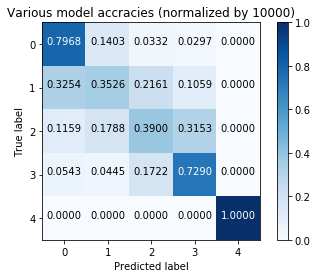

In [83]:
plt.imshow(cm, cmap = plt.get_cmap('Blues'))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.figure(figsize=(100,100))
plt.show()
plt.title("Various model accracies (normalized by 10000)")

In [25]:
sample_train_features = tfidf.transform(clean_train_reviews)

In [26]:
sample_train_pred = clf.predict(sample_train_features)

train_data_acc = round(accuracy_score(Y_train, sample_train_pred)*100, 2)

print("Train data acc: ", train_data_acc)

Train data acc:  99.99


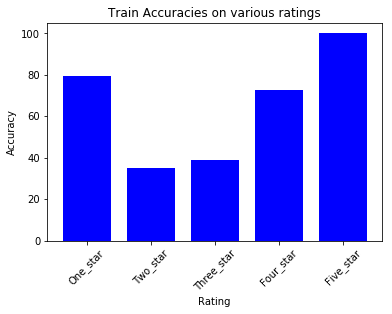

In [67]:
accuracies = [acc_1, acc_2, acc_3, acc_4, acc_5]

N = len(accuracies)

x = range(N)

width = 0.75

plt.title("Train Accuracies on various ratings")
plt.xlabel("Rating")

rating_values = ['One_star', 'Two_star', 'Three_star', 'Four_star', 'Five_star']

marks = np.arange(len(rating_values))

plt.xticks(marks, rating_values, rotation = 45)
plt.ylabel("Accuracy")

plt.bar(x, accuracies, width, color = 'blue')

plt.show()

In [28]:
print(clean_train_reviews[0])

thought tidi flower great reput florist guess wrong valentin day boyfriend order rose tidi howev flower deliv order place order long stem rose mix orchid charg show small vase short cut rose green tabl ornament realli valentin day flower speak anoth friend someth similar happen fiance order dozen rose valentin day germani surpris never show call complaint actual call friend confirm whether receiv flower said would resend onli deliv wrong place understand valentin day busiest day florist mistak happen way handl would expect florist natur


In [34]:
# vocab_words = []

# for i in range (0,100000):
#     review = clean_train_reviews[i]
#     words = review.lower().split()
        
#     for word in words: 
#         if word in vocab:
#             vocab_words.append(word)

# freqdist = FreqDist(words)
# print(freqdist.most_common())

KeyboardInterrupt: 

In [29]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [30]:
print(__version__)# requires version >= 1.9.0

init_notebook_mode(connected=True)

2.5.1


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)

In [ ]:
# pca_output = pca.fit_transform()

In [34]:
clf = RandomForestClassifier(n_estimators = 200)

clf.fit(train_features, Y_train)

pred_test = clf.predict(test_features)

print(type(pred_test))

acc = round(accuracy_score(Y_test, pred_test)*100, 2)

print(acc)

<class 'numpy.ndarray'>
64.91


In [ ]:
# from sklearn.svm import SVC

# clf = SVC()

# clf.fit(tf_train_features, Y_train)

# pred_test = clf.predict(tf_test_features)

# acc_svm = round(accuracy_score(Y_test, pred_test)*100, 2)

# print("Accuracy of SVM is: ", acc_svm)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbd = GradientBoostingClassifier()

gbd.fit(tf_train_features, Y_train)

gbd_pred = gbd.predict(tf_test_features)

acc_gbd = round(accuracy_score(Y_test, gbd_pred)*100, 2)

print(acc_gbd)

63.89


In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 400)

lr.fit(tf_train_features, Y_train)

lr_pred = lr.predict(tf_test_features)

acc_lr = round(accuracy_score(Y_test, lr_pred)*100, 2)

print(acc_lr)

67.95


[[ 7915  1439   309   337     0]
 [ 3176  3568  2172  1084     0]
 [ 1135  1844  3956  3065     0]
 [  492   527  1966  7015     0]
 [    0     0     0     0 10000]]


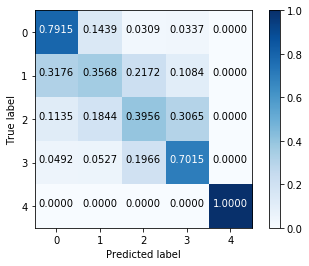

In [174]:
cm = confusion_matrix(Y_test, pred_test)

print(cm)

import itertools

normalize = True

if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


thresh = cm.max() / 1.5 if normalize else cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
        plt.text(j, i, "{:0.4f}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    else:
        plt.text(j, i, "{:,}".format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        
plt.imshow(cm, cmap = plt.get_cmap('Blues'))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.figure(figsize=(100,100))
plt.show()
plt.title("Various model accracies (normalized by 10000)")

In [140]:
test_case = tfidf.transform([review_to_words("Super place. Really loved it. The chicken was extra ordinary really good service by the waiters. A place everyone would love.")])

In [141]:
test_pred = lr.predict(test_case)
print(test_pred)

[4]


In [55]:
model_accuracies = [64.91, 65.37, 63.89, 67.95]

N = (len(model_accuracies))

x = range(N)

width = 0.75

model_names = ['Acc_CV_RF', 'Acc_TF_RF', 'Acc_TF_GBD', 'Acc_TF_REG']

marks = np.arange(len(model_names))
plt.xticks(marks, model_names, rotation = 45)
plt.xlabel("Models")
plt.ylabel("Accuracy of model")
plt.bar(x, model_accuracies, width, color = 'blue')
plt.title("Accuracies of different models used")


In [93]:
def  sentence_to_wordlist(text, labeled):

    review_text = BeautifulSoup(text).get_text()
    letters_only = re.sub("a-zA-Z", " ", review_text)
    letters_only = re.sub(r'[^\w\s]','',letters_only)
    
    words = letters_only.lower().split()

    important_words = []
    
    for word in words:
        word = stemmer.stem(word)
        if word not in stop_words:
            important_words.append(word)
            
    return important_words

In [94]:
def break_to_sentences(review):
    
    raw_sentences = nltk.sent_tokenize(review)
    
    sentences = []
    
    for raw_sentence in raw_sentences:
      if (len(raw_sentence) > 0):
            sentence = sentence_to_wordlist(raw_sentence, False)
            sentences.append(sentence)
            
    return sentences      

In [95]:
sentences = []

counter = 0

for review in train_text:
    if counter%1000 == 0:
        print("Processing Review: ", counter)
        
    counter += 1
    sentences += break_to_sentences(review)

counter = 0

Processing Review:  0


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/md/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning:

"b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.



Processing Review:  1000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:219: UserWarning:

"b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"https:\/\/www.facebook.com\/KTNVLasVegas\/videos\/10155266599443802\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.alternet.org\/culture\/pittsburgh-affordable-housing-replaced-whole-foods-store-epitome-gentrification" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  2000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.tripadvisor.ca\/ShowUserReviews-g155019-d5058760-r282140005-Reds_Midtown_Tavern-Toronto_Ontario.html#" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  3000
Processing Review:  4000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/cvpublicaccess.co.clark.nv.us\/pa\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  5000
Processing Review:  6000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.post-gazette.com\/news\/state\/2017\/03\/29\/tow-truck-pittsburgh-pa-towing-regulations-Dom-Costa-unscrupulous-business-practices\/stories\/201703290120" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  7000
Processing Review:  8000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.mayoclinic.org\/biographies\/engle-richard-l-m-d\/bio-20053381" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  9000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"https:\/\/www.facebook.com\/nail.spa.528\/posts\/1847989155416108" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/imgur.com\/a\/sf3RB" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  10000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"https:\/\/www.facebook.com\/pages\/Shut-Down-CASS\/343194025879420" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  11000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.maricopa.gov\/envsvc\/envwebapp\/tabs\/results.aspx?navigatedFrom=inspectionResultsDrillDown&in_insp_id=1547736&cat=02&type=01" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  12000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"https:\/\/photos.google.com\/share\/AF1QipMS3rF4pc3NOhn8SlJ0sxLbmQwcMlAgFo8aDzZJZeXeXx6g7VR00yXppyhwy-odWQ?key=WldxWC1aWU1tRVFwblpEWEhsdGtlcUR6eEk4TWtR" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.phoenixnewtimes.com\/arts\/whats-happening-at-the-icehouse-in-downtown-phoenix-depends-whom-you-ask-7670753" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  13000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"https:\/\/youtu.be\/luRf7fRXX5A

http:\/\/www.ethicalpsychology.com\/2011\/11\/psychologist-gets-jail-time-for-sex.html?m=1
#oasishiresexoffenders" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  14000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.cbs5az.com\/story\/31910490\/dirty-dining-may-5-popular-grocery-store-has-5-health-code-violations" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/codes.ohio.gov\/orc\/1349.61." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  15000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"https:\/\/m.facebook.com\/jennifer.titus.35175\/activity\/153782308437557" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  16000
Processing Review:  17000
Processing Review:  18000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/globalnews.ca\/news\/2316618\/bier-markt-backtracks-on-skimpy-dress-code-for-female-employees\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  19000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.ktnv.com\/news\/investigations\/customers-ask-us-to-investigate-local-photographer" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  20000
Processing Review:  21000
Processing Review:  22000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.maricopa.gov\/EnvSvc\/OnlineApplication\/EnvironmentalHealth\/FoodSearchInspection?p=FD-14694&i=0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/is.gd\/4Xli8
http:\/\/is.gd\/4Xlg2" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  23000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.merchantcircle.com\/business\/Wynn.Las.Vegas.702-770-7000" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  24000
Processing Review:  25000
Processing Review:  26000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.mgmgrand.com\/entertainment\/lion-habitat.aspx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  27000
Processing Review:  28000
Processing Review:  29000
Processing Review:  30000
Processing Review:  31000
Processing Review:  32000
Processing Review:  33000
Processing Review:  34000
Processing Review:  35000
Processing Review:  36000
Processing Review:  37000
Processing Review:  38000
Processing Review:  39000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/cn1.kaboodle.com\/hi\/img\/c\/0\/0\/103\/6\/AAAADDLg2GYAAAAAAQNgfQ.jpg?v=1289179942000)." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  40000
Processing Review:  41000
Processing Review:  42000
Processing Review:  43000
Processing Review:  44000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/smallhandfoods.com\/recipes\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.nandoscanada.com\/sections.html#Our%20Restaurants" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  45000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.merchantcircle.com\/business\/Las.Vegas.Hilton.702-732-5301" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  46000
Processing Review:  47000
Processing Review:  48000
Processing Review:  49000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/dancing-in-high-heels.blogspot.co.uk\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  50000
Processing Review:  51000
Processing Review:  52000
Processing Review:  53000
Processing Review:  54000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/en.wikipedia.org\/wiki\/Yakult" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  55000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.yelp.com\/biz_photos\/d0K97p5aQMWgA3x2mQBMSA?select=FiATiPgGi-OlaI1CZr2Svw" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  56000
Processing Review:  57000
Processing Review:  58000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"https:\/\/healthinspectionspeel.hedgerowsoftware.com\/Facility\/Details\/a6286df5-847f-49bb-83f0-a312481676bf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  59000
Processing Review:  60000
Processing Review:  61000
Processing Review:  62000
Processing Review:  63000
Processing Review:  64000
Processing Review:  65000
Processing Review:  66000
Processing Review:  67000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.fuistetravels.com\/mountains\/camelbackmountain" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.fuistetravels.com\/wanderings\/windcavetrail" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  68000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.mariposacruises.com\/our-fleet-flinders.php" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.hhovv.org\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  69000
Processing Review:  70000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/eatinginpittsburgh.com\/2010\/07\/07\/ive-got-an-itch-for-kitsch-quiet-storm-in-bloomfield\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/eatinginpittsburgh.com\/2011\/02\/09\/culinary-merits-bryant-street\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/bellsdineredinburgh.com" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that

Processing Review:  71000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.merchantcircle.com\/business\/I.Love.Sushi.702-990-4055" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.merchantcircle.com\/business\/The.Cheesecake.Factory.702-207-6372" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  72000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"https:\/\/www.youtube.com\/watch?v=LVC1C3ixQJ8" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  73000
Processing Review:  74000
Processing Review:  75000
Processing Review:  76000
Processing Review:  77000
Processing Review:  78000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/www.beeradvocate.com\/beer\/profile\/142\/1946\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"http:\/\/morethanjustdessert.wordpress.com\/2012\/05\/20\/daisy-cafe-cupcakery-restaurant-review\/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  79000


/home/md/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning:

"https:\/\/youtu.be\/irOabhSLanU" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Processing Review:  80000
Processing Review:  81000
Processing Review:  82000
Processing Review:  83000
Processing Review:  84000
Processing Review:  85000
Processing Review:  86000
Processing Review:  87000
Processing Review:  88000
Processing Review:  89000
Processing Review:  90000
Processing Review:  91000
Processing Review:  92000
Processing Review:  93000
Processing Review:  94000
Processing Review:  95000
Processing Review:  96000
Processing Review:  97000
Processing Review:  98000
Processing Review:  99000


In [104]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',
                    level=logging.INFO)

from gensim.models import word2vec
t = time.time()
print("Training the model: ")
model = word2vec.Word2Vec(sentences, workers = 10, size = 1000, min_count = 60, window = 10,iter = 12,
                         sample = 1e-3)
t = time.time() - t
print("Time to train the model was: ", t)

2018-04-20 21:16:00,205 : INFO : collecting all words and their counts
2018-04-20 21:16:00,209 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-20 21:16:00,246 : INFO : PROGRESS: at sentence #10000, processed 76911 words, keeping 7765 word types
2018-04-20 21:16:00,288 : INFO : PROGRESS: at sentence #20000, processed 151425 words, keeping 10990 word types
2018-04-20 21:16:00,328 : INFO : PROGRESS: at sentence #30000, processed 230477 words, keeping 13710 word types
2018-04-20 21:16:00,358 : INFO : PROGRESS: at sentence #40000, processed 305346 words, keeping 15883 word types
2018-04-20 21:16:00,391 : INFO : PROGRESS: at sentence #50000, processed 383389 words, keeping 17724 word types


Training the model: 


2018-04-20 21:16:00,423 : INFO : PROGRESS: at sentence #60000, processed 457703 words, keeping 19453 word types
2018-04-20 21:16:00,456 : INFO : PROGRESS: at sentence #70000, processed 535002 words, keeping 21206 word types
2018-04-20 21:16:00,502 : INFO : PROGRESS: at sentence #80000, processed 612182 words, keeping 22959 word types
2018-04-20 21:16:00,536 : INFO : PROGRESS: at sentence #90000, processed 687868 words, keeping 24510 word types
2018-04-20 21:16:00,580 : INFO : PROGRESS: at sentence #100000, processed 764573 words, keeping 25905 word types
2018-04-20 21:16:00,619 : INFO : PROGRESS: at sentence #110000, processed 841100 words, keeping 27404 word types
2018-04-20 21:16:00,661 : INFO : PROGRESS: at sentence #120000, processed 916917 words, keeping 29052 word types
2018-04-20 21:16:00,695 : INFO : PROGRESS: at sentence #130000, processed 993136 words, keeping 30363 word types
2018-04-20 21:16:00,734 : INFO : PROGRESS: at sentence #140000, processed 1070253 words, keeping 316

2018-04-20 21:16:03,333 : INFO : PROGRESS: at sentence #780000, processed 6259237 words, keeping 93707 word types
2018-04-20 21:16:03,407 : INFO : PROGRESS: at sentence #790000, processed 6444474 words, keeping 93707 word types
2018-04-20 21:16:03,474 : INFO : PROGRESS: at sentence #800000, processed 6629706 words, keeping 93707 word types
2018-04-20 21:16:03,539 : INFO : PROGRESS: at sentence #810000, processed 6815043 words, keeping 93707 word types
2018-04-20 21:16:03,611 : INFO : PROGRESS: at sentence #820000, processed 7000275 words, keeping 93707 word types
2018-04-20 21:16:03,684 : INFO : PROGRESS: at sentence #830000, processed 7185498 words, keeping 93707 word types
2018-04-20 21:16:03,749 : INFO : PROGRESS: at sentence #840000, processed 7370823 words, keeping 93707 word types
2018-04-20 21:16:03,815 : INFO : PROGRESS: at sentence #850000, processed 7556056 words, keeping 93707 word types
2018-04-20 21:16:03,874 : INFO : PROGRESS: at sentence #860000, processed 7741291 words,

2018-04-20 21:16:35,771 : INFO : EPOCH 1 - PROGRESS: at 79.25% examples, 244835 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:16:36,845 : INFO : EPOCH 1 - PROGRESS: at 80.79% examples, 245433 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:16:37,921 : INFO : EPOCH 1 - PROGRESS: at 82.61% examples, 247623 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:16:38,940 : INFO : EPOCH 1 - PROGRESS: at 84.19% examples, 248776 words/s, in_qsize 17, out_qsize 2
2018-04-20 21:16:39,942 : INFO : EPOCH 1 - PROGRESS: at 85.87% examples, 250498 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:16:40,967 : INFO : EPOCH 1 - PROGRESS: at 87.60% examples, 252212 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:16:42,099 : INFO : EPOCH 1 - PROGRESS: at 89.47% examples, 253802 words/s, in_qsize 20, out_qsize 1
2018-04-20 21:16:43,152 : INFO : EPOCH 1 - PROGRESS: at 91.39% examples, 256079 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:16:44,225 : INFO : EPOCH 1 - PROGRESS: at 93.07% examples, 256939 words/s,

2018-04-20 21:17:33,223 : INFO : EPOCH 3 - PROGRESS: at 12.81% examples, 233968 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:17:34,280 : INFO : EPOCH 3 - PROGRESS: at 16.20% examples, 236090 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:17:35,302 : INFO : EPOCH 3 - PROGRESS: at 19.51% examples, 237178 words/s, in_qsize 20, out_qsize 1
2018-04-20 21:17:36,338 : INFO : EPOCH 3 - PROGRESS: at 23.05% examples, 240012 words/s, in_qsize 19, out_qsize 2
2018-04-20 21:17:37,396 : INFO : EPOCH 3 - PROGRESS: at 26.46% examples, 240341 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:17:38,417 : INFO : EPOCH 3 - PROGRESS: at 30.14% examples, 243517 words/s, in_qsize 20, out_qsize 0
2018-04-20 21:17:39,418 : INFO : EPOCH 3 - PROGRESS: at 33.31% examples, 243030 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:17:40,510 : INFO : EPOCH 3 - PROGRESS: at 36.59% examples, 241555 words/s, in_qsize 19, out_qsize 2
2018-04-20 21:17:41,511 : INFO : EPOCH 3 - PROGRESS: at 40.29% examples, 243818 words/s,

2018-04-20 21:18:38,743 : INFO : EPOCH 4 - PROGRESS: at 77.86% examples, 251614 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:18:39,764 : INFO : EPOCH 4 - PROGRESS: at 79.44% examples, 252771 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:18:40,769 : INFO : EPOCH 4 - PROGRESS: at 81.03% examples, 253969 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:18:41,770 : INFO : EPOCH 4 - PROGRESS: at 82.71% examples, 255711 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:18:42,874 : INFO : EPOCH 4 - PROGRESS: at 84.34% examples, 256237 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:18:43,877 : INFO : EPOCH 4 - PROGRESS: at 86.16% examples, 258563 words/s, in_qsize 20, out_qsize 0
2018-04-20 21:18:44,888 : INFO : EPOCH 4 - PROGRESS: at 87.74% examples, 259404 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:18:45,888 : INFO : EPOCH 4 - PROGRESS: at 89.23% examples, 259785 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:18:46,895 : INFO : EPOCH 4 - PROGRESS: at 90.91% examples, 261073 words/s,

2018-04-20 21:19:35,087 : INFO : EPOCH 6 - PROGRESS: at 2.56% examples, 189993 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:19:36,104 : INFO : EPOCH 6 - PROGRESS: at 5.82% examples, 217934 words/s, in_qsize 18, out_qsize 1
2018-04-20 21:19:37,128 : INFO : EPOCH 6 - PROGRESS: at 9.20% examples, 229550 words/s, in_qsize 20, out_qsize 1
2018-04-20 21:19:38,148 : INFO : EPOCH 6 - PROGRESS: at 12.23% examples, 229246 words/s, in_qsize 19, out_qsize 1
2018-04-20 21:19:39,155 : INFO : EPOCH 6 - PROGRESS: at 15.74% examples, 236178 words/s, in_qsize 19, out_qsize 1
2018-04-20 21:19:40,197 : INFO : EPOCH 6 - PROGRESS: at 19.16% examples, 237945 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:19:41,295 : INFO : EPOCH 6 - PROGRESS: at 22.81% examples, 239887 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:19:42,307 : INFO : EPOCH 6 - PROGRESS: at 26.09% examples, 240527 words/s, in_qsize 18, out_qsize 1
2018-04-20 21:19:43,323 : INFO : EPOCH 6 - PROGRESS: at 29.66% examples, 242847 words/s, in

2018-04-20 21:20:40,486 : INFO : EPOCH 7 - PROGRESS: at 72.77% examples, 247985 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:20:41,487 : INFO : EPOCH 7 - PROGRESS: at 74.36% examples, 249622 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:20:42,494 : INFO : EPOCH 7 - PROGRESS: at 75.84% examples, 250423 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:20:43,529 : INFO : EPOCH 7 - PROGRESS: at 77.48% examples, 251864 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:20:44,548 : INFO : EPOCH 7 - PROGRESS: at 79.16% examples, 253643 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:20:45,592 : INFO : EPOCH 7 - PROGRESS: at 80.79% examples, 254798 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:20:46,612 : INFO : EPOCH 7 - PROGRESS: at 82.32% examples, 255501 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:20:47,619 : INFO : EPOCH 7 - PROGRESS: at 83.91% examples, 256539 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:20:48,635 : INFO : EPOCH 7 - PROGRESS: at 85.54% examples, 257707 words/s,

2018-04-20 21:21:39,766 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-20 21:21:39,785 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-04-20 21:21:39,786 : INFO : EPOCH - 8 : training on 12622807 raw words (11127000 effective words) took 42.1s, 264098 effective words/s
2018-04-20 21:21:40,801 : INFO : EPOCH 9 - PROGRESS: at 2.44% examples, 185926 words/s, in_qsize 18, out_qsize 1
2018-04-20 21:21:41,814 : INFO : EPOCH 9 - PROGRESS: at 5.72% examples, 216470 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:21:42,870 : INFO : EPOCH 9 - PROGRESS: at 8.96% examples, 223492 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:21:43,879 : INFO : EPOCH 9 - PROGRESS: at 12.23% examples, 229361 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:21:44,927 : INFO : EPOCH 9 - PROGRESS: at 15.73% examples, 234590 words/s, in_qsize 18, out_qsize 1
2018-04-20 21:21:45,931 : INFO : EPOCH 9 - PROGRESS: at 19.16% examples, 238129 words/s, in_qsize 19, out_qsize

2018-04-20 21:22:43,941 : INFO : EPOCH 10 - PROGRESS: at 68.17% examples, 240441 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:22:44,967 : INFO : EPOCH 10 - PROGRESS: at 69.70% examples, 241957 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:22:45,999 : INFO : EPOCH 10 - PROGRESS: at 71.29% examples, 243650 words/s, in_qsize 19, out_qsize 2
2018-04-20 21:22:47,032 : INFO : EPOCH 10 - PROGRESS: at 72.87% examples, 245197 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:22:48,039 : INFO : EPOCH 10 - PROGRESS: at 74.36% examples, 246192 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:22:49,049 : INFO : EPOCH 10 - PROGRESS: at 75.99% examples, 248059 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:22:50,053 : INFO : EPOCH 10 - PROGRESS: at 77.57% examples, 249520 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:22:51,094 : INFO : EPOCH 10 - PROGRESS: at 79.06% examples, 249972 words/s, in_qsize 19, out_qsize 0
2018-04-20 21:22:52,126 : INFO : EPOCH 10 - PROGRESS: at 80.64% examples, 251046

2018-04-20 21:23:47,254 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-04-20 21:23:47,275 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-04-20 21:23:47,360 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-04-20 21:23:47,367 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-04-20 21:23:47,388 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-04-20 21:23:47,456 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-20 21:23:47,458 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-20 21:23:47,466 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-20 21:23:47,478 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-04-20 21:23:47,480 : INFO : EPOCH - 11 : training on 12622807 raw words (11128310 effective words) took 42.8s, 260062 effective words/s
2018-04-20 21:23:48,498 : INFO : EPOCH 1

Time to train the model was:  510.56792664527893


In [105]:
model.init_sims(replace = True)

model_name = "mayank_model"
model.save(model_name)

2018-04-20 21:24:30,778 : INFO : precomputing L2-norms of word weight vectors
2018-04-20 21:24:30,920 : INFO : saving Word2Vec object under mayank_model, separately None
2018-04-20 21:24:30,921 : INFO : not storing attribute vectors_norm
2018-04-20 21:24:30,922 : INFO : not storing attribute cum_table
2018-04-20 21:24:32,006 : INFO : saved mayank_model


In [106]:
from gensim.models import Word2Vec
model = Word2Vec.load("mayank_model")

model.wv.vocab

2018-04-20 21:24:32,017 : INFO : loading Word2Vec object from mayank_model
2018-04-20 21:24:32,344 : INFO : loading wv recursively from mayank_model.wv.* with mmap=None
2018-04-20 21:24:32,345 : INFO : setting ignored attribute vectors_norm to None
2018-04-20 21:24:32,346 : INFO : loading vocabulary recursively from mayank_model.vocabulary.* with mmap=None
2018-04-20 21:24:32,347 : INFO : loading trainables recursively from mayank_model.trainables.* with mmap=None
2018-04-20 21:24:32,348 : INFO : setting ignored attribute cum_table to None
2018-04-20 21:24:32,349 : INFO : loaded mayank_model


{'thought': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b0b8>,
 'tidi': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b860>,
 'flower': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b748>,
 'great': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b668>,
 'reput': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b208>,
 'guess': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b128>,
 'wrong': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b400>,
 'valentin': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b2e8>,
 'day': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b3c8>,
 'boyfriend': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b320>,
 'order': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b080>,
 'rose': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b710>,
 'howev': <gensim.models.keyedvectors.Vocab at 0x7f1940c4b9b0>,
 'deliv': <gensim.models.keyedvectors.Vocab at 0x7f1940c4ba58>,
 'place': <gensim.models.keyedvectors.Vocab at 0x7f1940adec18>,
 'long': <gensim.models.keyedvecto

In [107]:
index2word_set = set(model.wv.index2word)
def make_feature_vector(words, num_features):
    featurevec = np.zeros((num_features), dtype = "float32")
    
    n_words = 0
    
    for word in words:
        if word in index2word_set:
            n_words = n_words + 1
            featurevec = np.add(featurevec, model[word])
        
    featurevec = np.divide(featurevec, n_words)
    
    return featurevec

In [108]:
def get_feature_vecs(reviews, num_features):
    
    counter = 0
    feature_vecs = np.zeros((len(reviews),num_features), dtype = "float32")
    
    for r in reviews:
        features = make_feature_vector(r, num_features)
        
        if counter % 1000 == 0:
            print("Processing Review : ", counter)
        
        counter += 1
        
        feature_vecs = np.add(feature_vecs, features)
    
    return feature_vecs

In [111]:
feature_vecs = get_feature_vecs(clean_train_reviews, num_features = 1000)
print(len(feature_vecs))

/home/md/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



Processing Review :  0


KeyboardInterrupt: 

In [ ]:
test_feature_vecs = get_feature_vecs(clean_test_reviews, num_features = 1000)
print(len(test_feature_vecs))

In [ ]:
import numba as nb
from numpy import inf

In [ ]:
mask = np.isnan(feature_vecs)
idx = np.where(~mask,np.arange(mask.shape[1]),0)
feature_vecs[mask] = feature_vecs[np.nonzero(mask)[0], idx[mask]]

In [ ]:
feature_vecs[feature_vecs == inf] = 0
feature_vecs[feature_vecs == -inf] = 0

In [ ]:
mask = np.isnan(test_feature_vecs)
idx = np.where(~mask,np.arange(mask.shape[1]),0)
test_feature_vecs[mask] = test_feature_vecs[np.nonzero(mask)[0], idx[mask]]

test_feature_vecs[test_feature_vecs == inf] = 0
test_feature_vecs[test_feature_vecs == -inf] = 0

In [ ]:
from numpy import nan_to_num
feature_vecs = np.nan_to_num(feature_vecs)
test_feature_vecs = np.nan_to_num(test_feature_vecs)

In [ ]:
clf = LogisticRegression(max_iter = 300)

clf.fit(feature_vecs, Y_train)

In [ ]:
pred_vecs = clf.predict(test_feature_vecs)

In [ ]:
print(type(test_feature_vecs))

In [ ]:
acc_w2v = round(accuracy_score(Y_test, pred_vecs)*100, 2)

print("Accuracy of word2vec is : ", acc_w2v)

In [149]:
from sklearn.utils.Recovered import *

ModuleNotFoundError: No module named 'sklearn.utils.Recovered'

In [152]:
BOW_VS_W2V = [20, 63.89]

plt.plot([1, 5], [20, 63.89], 'ro')
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Bag of Words vs Word2Vec")
plt.show()

In [161]:
from IPython.display import Image

In [171]:
Image("/home/md/Downloads/ML/pca-gru.png")

In [173]:
Image("/home/md/Downloads/ML/TSN-e-gru.png")